In [5]:
import importlib

In [58]:
import numpy as np
import pandas as pd

from utils import nodes as nd
from utils import visualization as vs
from utils import network as nw
from utils import measure as ms

In [59]:
importlib.reload(vs)
importlib.reload(nd)
importlib.reload(nw)
importlib.reload(ms)

<module 'utils.measure' from 'c:\\Users\\morit\\Documents\\___MASTER\\semester1\\complex_systems\\complex_social_systems\\utils\\measure.py'>

In [72]:
ops = (np.linspace(-1,1, num = 20))

media = [nd.Media(i,opinion=o) for i, o in enumerate(ops)]

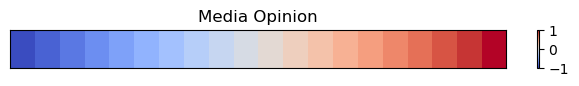

In [73]:
vs.visualize_media(media)

In [74]:
media

[Media(id=0, opinion=-1.0, category=blue, manipulated=False),
 Media(id=1, opinion=-0.8947368421052632, category=blue, manipulated=False),
 Media(id=2, opinion=-0.7894736842105263, category=blue, manipulated=False),
 Media(id=3, opinion=-0.6842105263157895, category=blue, manipulated=False),
 Media(id=4, opinion=-0.5789473684210527, category=blue, manipulated=False),
 Media(id=5, opinion=-0.4736842105263158, category=blue, manipulated=False),
 Media(id=6, opinion=-0.368421052631579, category=blue, manipulated=False),
 Media(id=7, opinion=-0.26315789473684215, category=neutral, manipulated=False),
 Media(id=8, opinion=-0.1578947368421053, category=neutral, manipulated=False),
 Media(id=9, opinion=-0.052631578947368474, category=neutral, manipulated=False),
 Media(id=10, opinion=0.05263157894736836, category=neutral, manipulated=False),
 Media(id=11, opinion=0.1578947368421053, category=neutral, manipulated=False),
 Media(id=12, opinion=0.26315789473684204, category=neutral, manipulated=

The Number N = 10 is to large, there are only 0 nodes in the category <loloolo> 


[Media(id=0, opinion=-1.0, category=blue, manipulated=False),
 Media(id=1, opinion=-0.8947368421052632, category=blue, manipulated=False),
 Media(id=2, opinion=-0.7894736842105263, category=blue, manipulated=False),
 Media(id=3, opinion=-0.6842105263157895, category=blue, manipulated=False),
 Media(id=4, opinion=-0.5789473684210527, category=blue, manipulated=False),
 Media(id=5, opinion=-0.4736842105263158, category=blue, manipulated=False),
 Media(id=6, opinion=-0.368421052631579, category=blue, manipulated=False),
 Media(id=7, opinion=-0.26315789473684215, category=neutral, manipulated=True),
 Media(id=8, opinion=-0.1578947368421053, category=neutral, manipulated=True),
 Media(id=9, opinion=-0.052631578947368474, category=neutral, manipulated=True),
 Media(id=10, opinion=0.05263157894736836, category=neutral, manipulated=True),
 Media(id=11, opinion=0.1578947368421053, category=neutral, manipulated=True),
 Media(id=12, opinion=0.26315789473684204, category=neutral, manipulated=True)

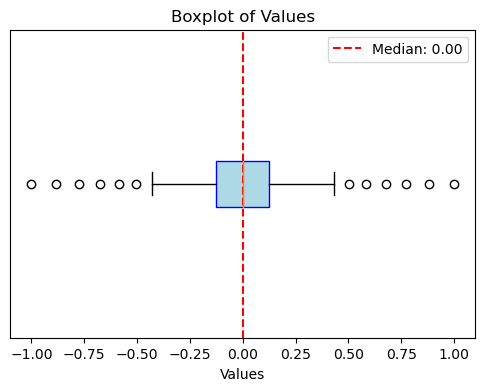

In [23]:
vs.media_boxplot(media)

In [24]:
# Function to create an nxn voter matrix, assign media connections and neighbors
def create_voter_matrix_and_media_connections(n, number_of_media=5):
    # Create an nxn matrix to hold Voter objects
    voter_matrix = np.empty((n, n), dtype=object)

    # Initialize Voter objects in the matrix
    for i in range(n):
        for j in range(n):
            # Initialize voters with position (i, j) and default opinion 0
            voter_matrix[i, j] = nd.Voter(i=i, j=j, opinion=0)

    # Assign the nearest neighbors for each voter (up, down, left, right)
    for i in range(n):
        for j in range(n):
            # Add neighbors (up, down, left, right)
            if i > 0:  # Up
                voter_matrix[i, j].add_neighbor(i-1, j)
            if i < n - 1:  # Down
                voter_matrix[i, j].add_neighbor(i+1, j)
            if j > 0:  # Left
                voter_matrix[i, j].add_neighbor(i, j-1)
            if j < n - 1:  # Right
                voter_matrix[i, j].add_neighbor(i, j+1)

    # Generate media landscape (let's create `number_of_media` media nodes)
    media = nw.generate_media_landscape(number_of_media=number_of_media, mode="standard")

    # Assign random media connections to each voter in the matrix
    for i in range(n):
        for j in range(n):
            # Randomly assign 1 to 3 media connections to each voter
            num_media_connections = np.random.randint(1, 4)
            for _ in range(num_media_connections):
                media_id = np.random.choice([m.get_id() for m in media])
                voter_matrix[i, j].add_media_connection(media_id)

    return voter_matrix, media

In [25]:
network, media = create_voter_matrix_and_media_connections(10, number_of_media=15)

network[2,1].set_opinion(1)
network[2,2].set_opinion(1)
network[2,3].set_opinion(-1)
network[2,0].set_opinion(-1)


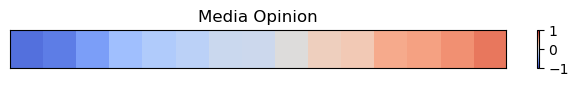

In [26]:
vs.visualize_media(media)

In [27]:
ms.media_statistics(media)

15
15
[0.4666666666666667]


,mean,std,blue,neutral,red
0,-0.061041,0.452519,0.266667,0.466667,0.266667


In [59]:
media[1].get_category()

'red'

In [49]:
# vs.media_voter_histogramms(network=network, media=media)

In [43]:
importlib.reload(vs)
importlib.reload(nd)

<module 'utils.nodes' from 'c:\\Users\\morit\\Documents\\___MASTER\\semester1\\complex_systems\\complex_social_systems\\utils\\nodes.py'>

In [109]:
v = ut.Voter

print(v)

<class 'utils.utils.Voter'>


In [110]:
ut.generate_media_landscape(number_of_media=10)

,node,media_id
media_id,,
10,"Media(id=10, opinion=-0.48891869548510325)",10
11,"Media(id=11, opinion=0.051128513495108496)",11
12,"Media(id=12, opinion=-0.627047774047635)",12
13,"Media(id=13, opinion=0.3469254125273229)",13
14,"Media(id=14, opinion=-0.9533379132220208)",14
15,"Media(id=15, opinion=0.34763717898967506)",15
16,"Media(id=16, opinion=-0.9038872798899615)",16
17,"Media(id=17, opinion=-0.7759502545927557)",17
18,"Media(id=18, opinion=0.7045700022776229)",18


In [117]:
n = 5

# Create voter matrix and media connections
voter_matrix, media_df = create_voter_matrix_and_media_connections(n, number_of_media=10)

# Display voters and their media connections along with their neighbors
for i in range(n):
    for j in range(n):
        voter = voter_matrix[i, j]
        neighbors = voter.get_neighbors()
        print(f"Voter at ({i}, {j}): Opinion = {voter.get_opinion()}, Media Connections = {voter.get_media_connections()}, Neighbors = {neighbors}")

# Display the media nodes and their opinions
print("\nMedia Nodes:")
print(media_df)

Voter at (0, 0): Opinion = 0, Media Connections = [12, 14, 14], Neighbors = [(1, 0), (0, 1)]
Voter at (0, 1): Opinion = 0, Media Connections = [11, 11, 18], Neighbors = [(1, 1), (0, 0), (0, 2)]
Voter at (0, 2): Opinion = 0, Media Connections = [12, 16], Neighbors = [(1, 2), (0, 1), (0, 3)]
Voter at (0, 3): Opinion = 0, Media Connections = [14, 11], Neighbors = [(1, 3), (0, 2), (0, 4)]
Voter at (0, 4): Opinion = 0, Media Connections = [15], Neighbors = [(1, 4), (0, 3)]
Voter at (1, 0): Opinion = 0, Media Connections = [16, 19], Neighbors = [(0, 0), (2, 0), (1, 1)]
Voter at (1, 1): Opinion = 0, Media Connections = [19], Neighbors = [(0, 1), (2, 1), (1, 0), (1, 2)]
Voter at (1, 2): Opinion = 0, Media Connections = [17, 17], Neighbors = [(0, 2), (2, 2), (1, 1), (1, 3)]
Voter at (1, 3): Opinion = 0, Media Connections = [18, 18, 19], Neighbors = [(0, 3), (2, 3), (1, 2), (1, 4)]
Voter at (1, 4): Opinion = 0, Media Connections = [18, 14, 12], Neighbors = [(0, 4), (2, 4), (1, 3)]
Voter at (2, 0

In [118]:
importlib.reload(ut)

<module 'utils.utils' from 'c:\\Users\\morit\\Documents\\___MASTER\\semester1\\complex_systems\\complex_social_systems\\utils\\utils.py'>

In [128]:
media_df

,node,media_id
media_id,,
10,"Media(id=10, opinion=0.2944229893844008)",10
11,"Media(id=11, opinion=0.14952459012066854)",11
12,"Media(id=12, opinion=0.1658993123266972)",12
13,"Media(id=13, opinion=0.7245635958014731)",13
14,"Media(id=14, opinion=-0.14940119699507948)",14
15,"Media(id=15, opinion=-0.5587288102367287)",15
16,"Media(id=16, opinion=0.5023383336080918)",16
17,"Media(id=17, opinion=-0.3279040854171631)",17
18,"Media(id=18, opinion=-0.3474738947839622)",18



Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [78]:
import numpy as np

In [79]:
np.arange(1,20,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [83]:
liste = []
liste =liste.append([1])
liste.append([2])

liste

AttributeError: 'NoneType' object has no attribute 'append'

In [3]:
import numpy as np
(np.arange(1,5))



array([1, 2, 3, 4])

In [130]:
np.linspace(1,1,num= 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
importlib.reload(um)

<module 'utils.measure' from 'c:\\Users\\morit\\Documents\\___MASTER\\semester1\\complex_systems\\complex_social_systems\\utils\\measure.py'>

In [25]:
from utils.network import *
import utils.measure as um

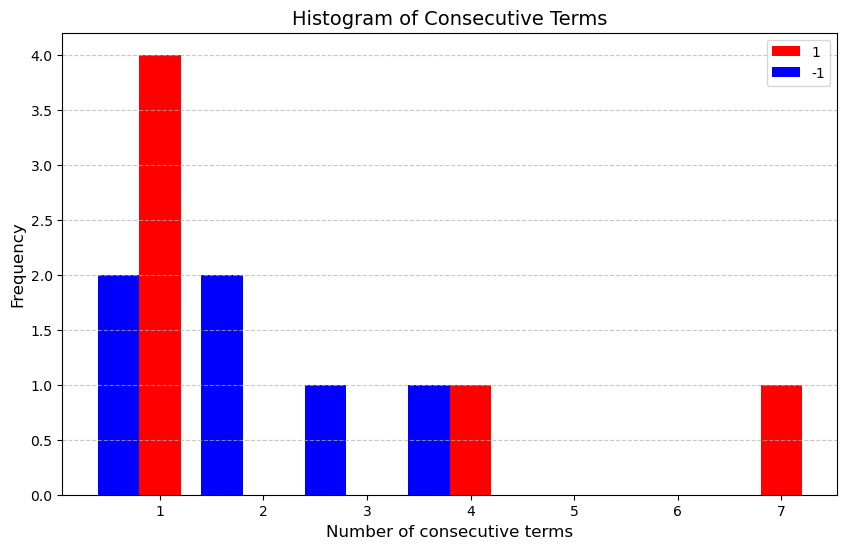

In [27]:
liste = [1,1,1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1]
df = um.get_consecutive_terms_counts(liste)
um.create_consecutive_terms_histogram(df)

In [2]:
import matplotlib.pyplot as plt

In [4]:
plt.plot([1,2,3,4],[4,5,6,7])
plt.xlabel("$\frac{r}{\theta}$")
plt.show()

ValueError: 
$rac{r}{       heta}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

In [3]:
import numpy as np
number_of_media = np.arange(1,25,3)
print(len(number_of_media))


8
